In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture

iris = datasets.load_iris()
X = iris.data
y = iris.target


In [2]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

predicted_labels = gmm.predict(X)
cluster_probabilities = gmm.predict_proba(X)

C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [3]:
for cluster in range(3):
    cluster_samples = X[predicted_labels == cluster]
    cluster_label_counts = np.bincount(y[predicted_labels == cluster])
    dominant_label = np.argmax(cluster_label_counts)
    print(f'Cluster {cluster+1}:')
    print(f'Number of samples: {len(cluster_samples)}')
    print(f'Dominant actual label: {dominant_label}')
    print(f'Cluster probabilities: {np.mean(cluster_probabilities[predicted_labels == cluster], axis=0)}')
    print()


Cluster 1:
Number of samples: 55
Dominant actual label: 2
Cluster probabilities: [9.85975428e-01 7.57333493e-94 1.40245715e-02]

Cluster 2:
Number of samples: 50
Dominant actual label: 0
Cluster probabilities: [2.29171069e-21 1.00000000e+00 1.52605930e-16]

Cluster 3:
Number of samples: 45
Dominant actual label: 1
Cluster probabilities: [1.58748244e-02 7.34657584e-30 9.84125176e-01]



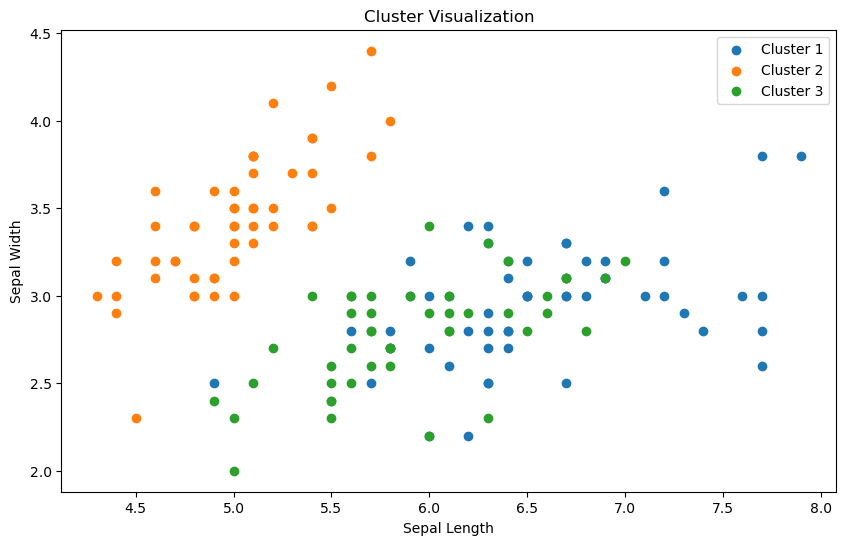

In [4]:
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_samples = X[predicted_labels == cluster]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {cluster+1}')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Cluster Visualization')
plt.legend()
plt.show()
